<a href="https://colab.research.google.com/github/Trishakatam2/Sparks-Foundation/blob/main/Task_6_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Decision Tree Classifier model**###

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#Ignoring warnings

import warnings
warnings.simplefilter("ignore")

###**Reading Data**###

In [34]:
import sklearn.datasets as datasets
# Loading the iris dataset
iris=datasets.load_iris()

# creating iris dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#printing first 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
#target Variable
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
#printing last 5 rows of the dataset

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [17]:
#printing shape

print("Shape :", df.shape)

Shape : (150, 4)


In [18]:
#priting the features of the dataset

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [19]:
#learning more about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [20]:
#statistics of the data

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###**Visualizing Data**###

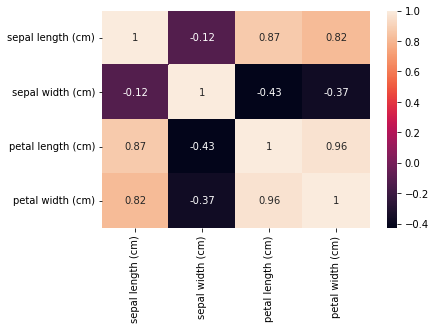

In [21]:
import seaborn as sns
#Heatmap
sns.heatmap(df.corr(), annot =True)

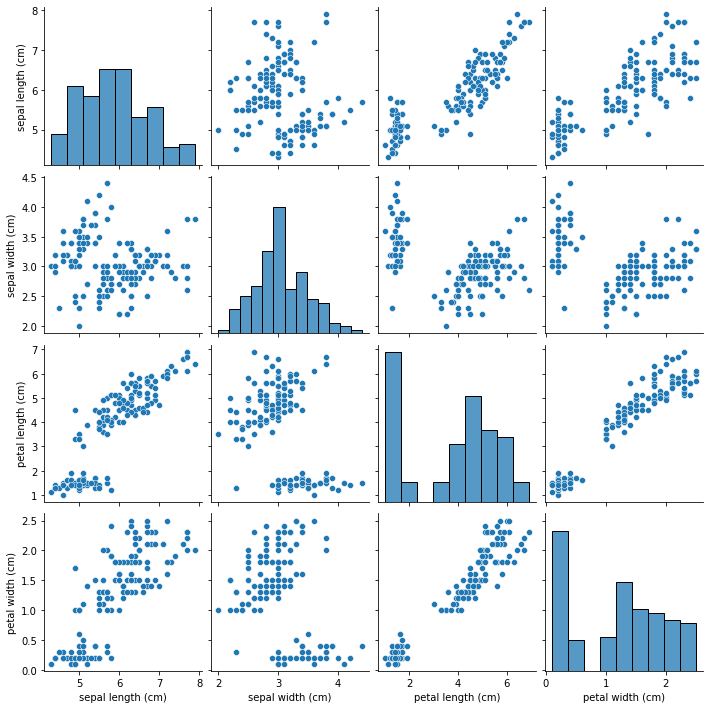

In [22]:
sns.pairplot(df, kind='scatter')

Splitting the dataset into training and testing using skleran train_test_split method

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=100)

Constructing Decision Tree Classifier model

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=100)
dt_model = tree.fit(X_train, y_train)

In [25]:
#making predictions
y_predict = dt_model.predict(X_test)

###Visualizing the Decision Tree###

In [28]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


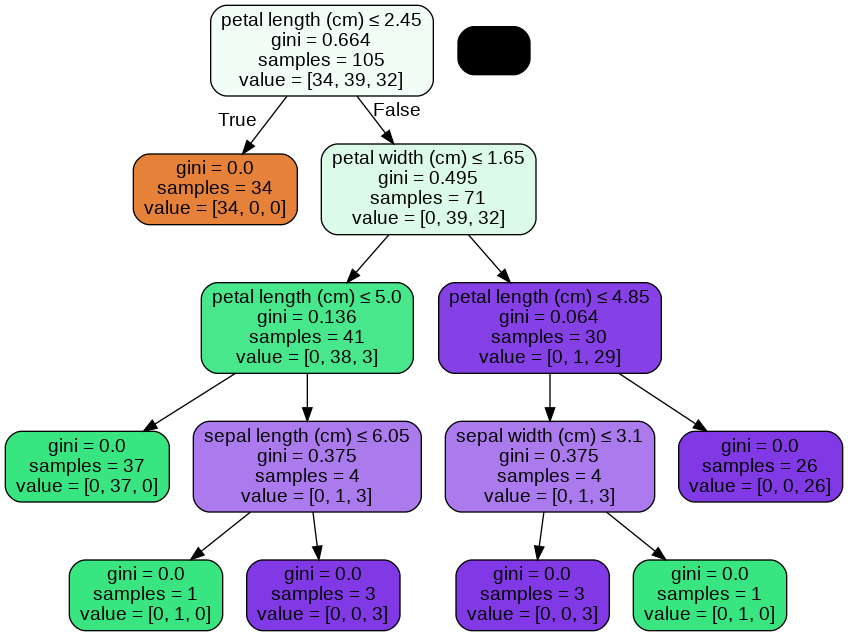

In [32]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_predict, y_test)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

Checking the accuracy of the model


In [33]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_predict, y_test)
print("The model's accuracy is: ", round(model_accuracy*100, 2))

The model's accuracy is:  95.56
